C:\Users\VivoBook\AppData\Local\Temp\ipykernel_12552\2380406699.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
The first model's score: 0.7579143389199255
The second model's score: 0.776536312849162
The logistic model's score: 0.7728119180633147


C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


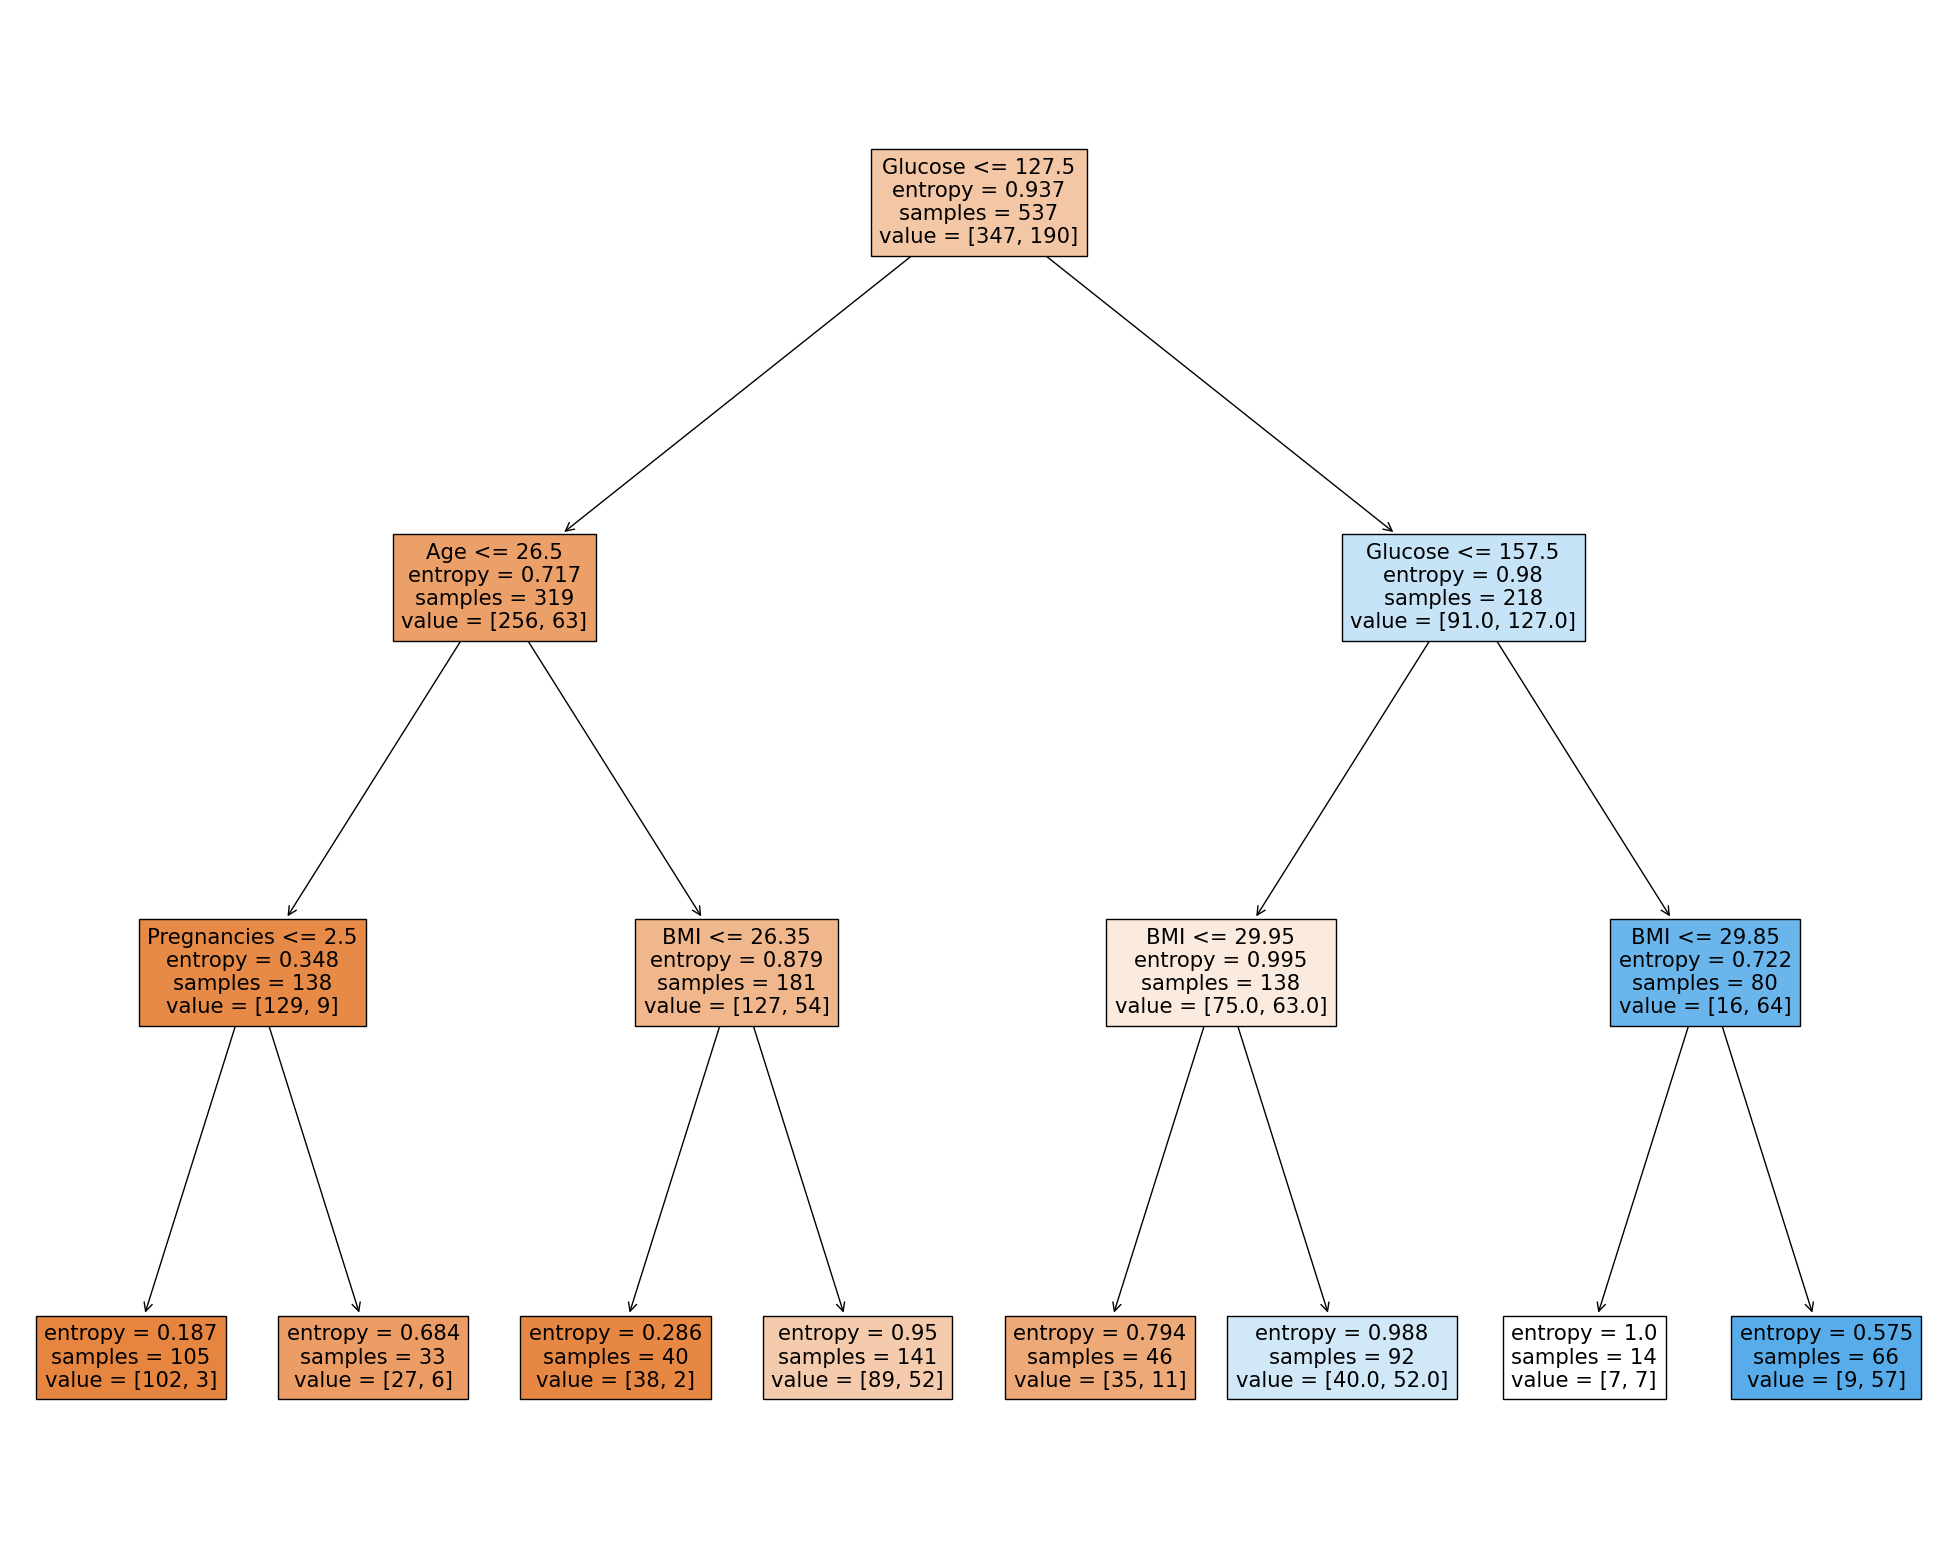

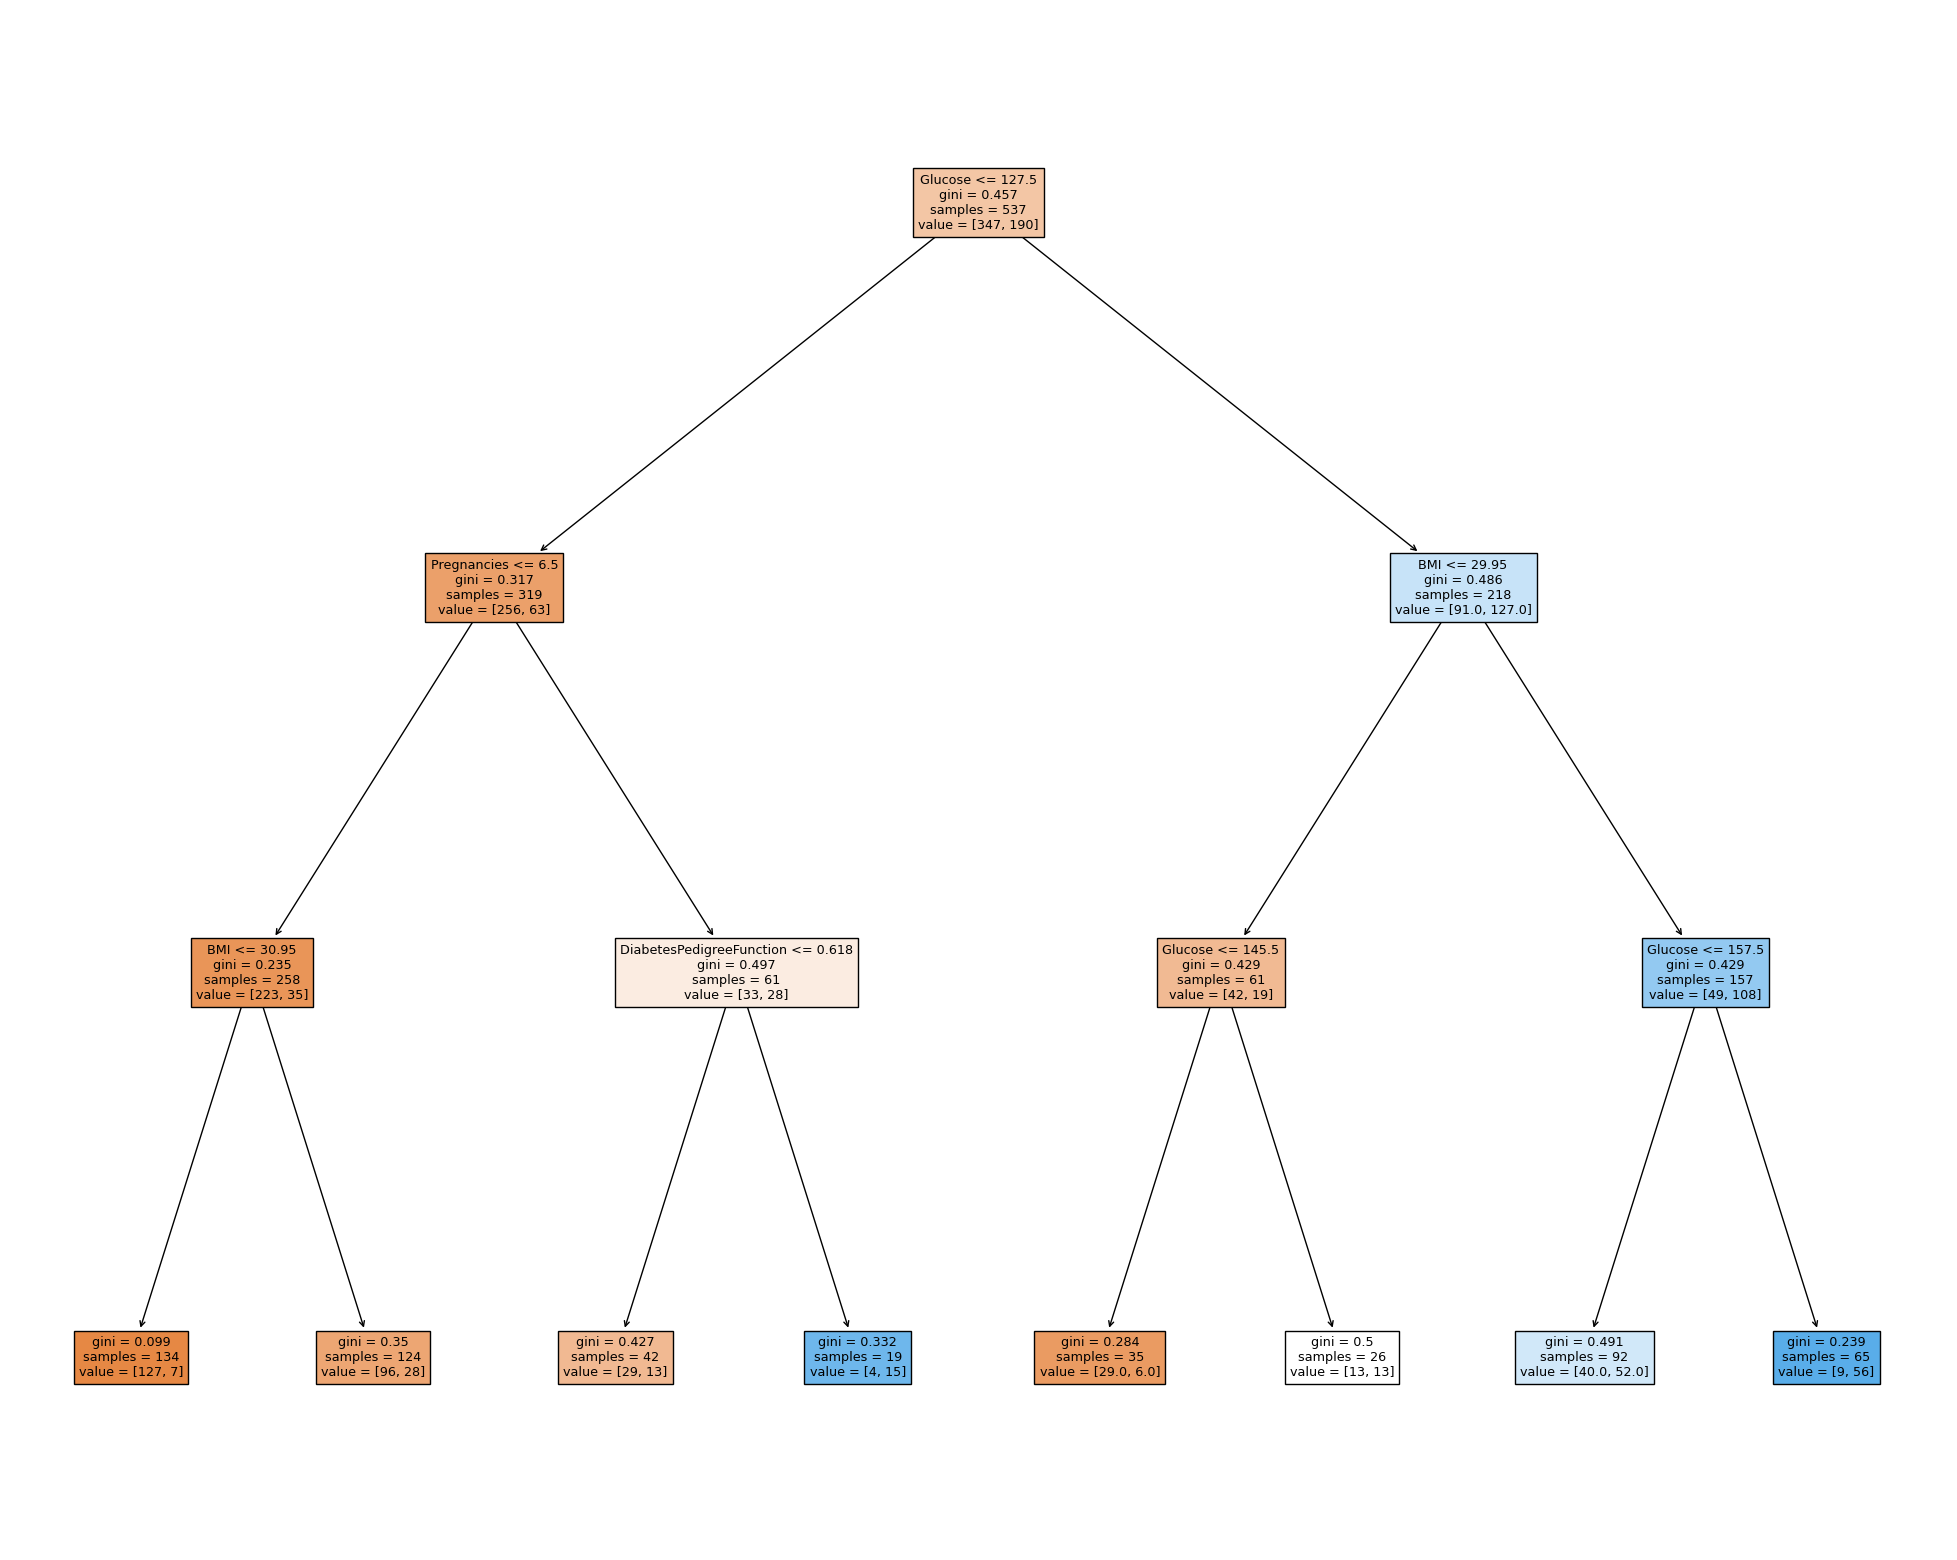

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("diabetes.csv")

print(data.head())

classes = data.drop('Outcome', axis='columns')
target = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(classes, target, test_size=0.3)

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x_train, y_train)
print(f"The first model's score: {model1.score(x_train, y_train)}")

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x_train, y_train)
print(f"The second model's score: {model2.score(x_train, y_train)}")

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
print(f"The logistic model's score: {logistic_model.score(x_train, y_train)}")

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, feature_names=x_train.columns, filled=True)

fig = plt.figure(figsize=(25,20))  
_ = tree.plot_tree(model2, feature_names=x_train.columns, filled=True)

We trained decision tree and logistic regression models to predict whether a patient has diabetes based on diagnostic measures. The logistic regression model achieved an accuracy score of 0.773. The gini-based tree achieved the highest score of 0.776 whereas the entropy-based tree model achieved 0.756.

Decision trees offer greater interpretability, allowing us to visualize the decision rules and feature importances.